In [51]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [52]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

In [54]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(StandardScaler(), Ridge(alpha=0))

In [55]:
cv_results = cross_validate(ridge, data_numerical, target,
    cv=10, return_train_score=True, return_estimator=True)

C:\Users\bruce\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.83033e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\bruce\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.14675e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\bruce\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.57038e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [56]:
# Q1:
for est in cv_results["estimator"]:
    print(est[-1].coef_.max())

32869.4893643532
1.499862118067831e+18
32555.044233637484
2.2853394816057828e+18
1.007702090214119e+19
6.558173436694587e+17
4.2182112180606484e+18
6.781730909307027e+18
73001.84246421077
5.245391072287307e+18


In [57]:
# Q2
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

cv_results = cross_validate(ridge, data_numerical, target,
    cv=10, return_train_score=True, return_estimator=True)

for est in cv_results["estimator"]:
    print(est[-1].coef_.max())

20867.28638325968
20329.015171924784
19764.50791273505
20169.592626080524
19571.095410466514
22562.76919825579
20127.655973643923
20032.64597118744
17142.30998421144
19144.189168869158


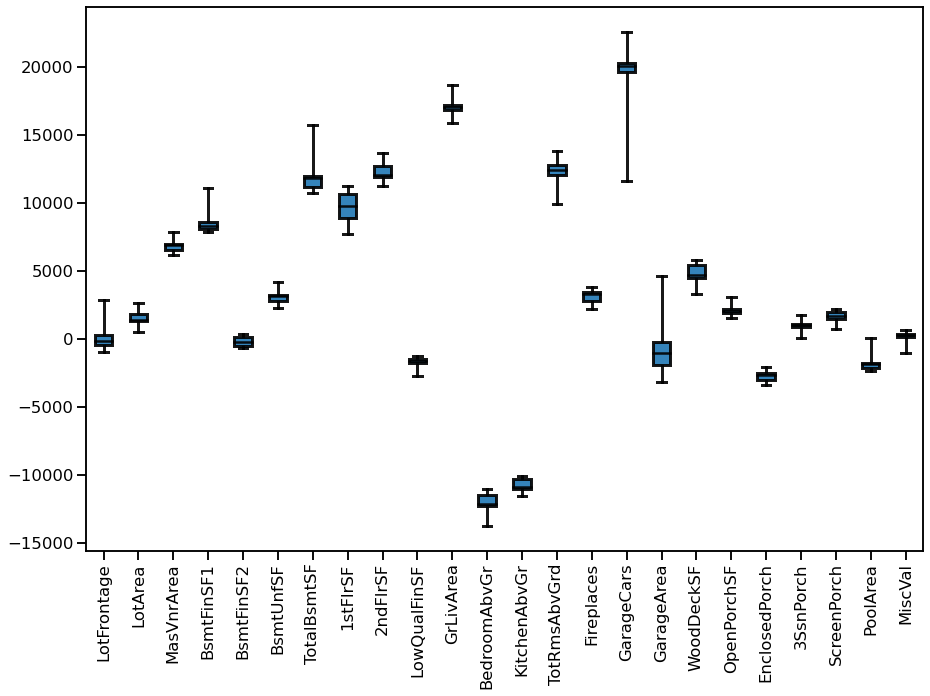

In [58]:
# Q3
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
coefs = pd.DataFrame([pipeline[-1].coef_ for pipeline in cv_results["estimator"]],
            columns=numerical_features)
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [62]:
#Q4
import copy

data_numerical_new = copy.deepcopy(data_numerical)
numerical_features_new = copy.deepcopy(numerical_features)
droped_feature = 'GarageArea'

print(numerical_features)

data_numerical_new = data_numerical_new.drop(columns=droped_feature)
numerical_features_new.remove(droped_feature)

print(data_numerical_new.shape, len(numerical_features_new))



['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
(1460, 23) 23


In [63]:
cv_results = cross_validate(ridge, data_numerical_new, target,
    cv=10, return_train_score=True, return_estimator=True)

for est in cv_results["estimator"]:
    print(est[-1].coef_.max())

19375.93077464534
18455.992304480995
18775.60473176336
18608.862582320082
19829.484415585346
19963.35113755684
19367.131900242068
19515.985783731794
17357.547158371726
19079.743564093864


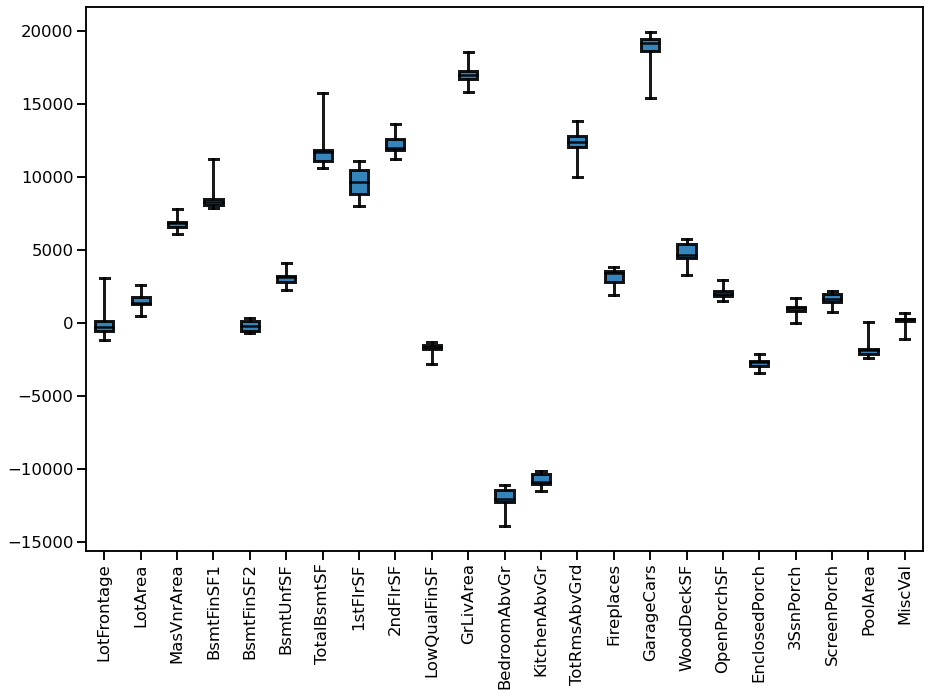

In [64]:
sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
coefs = pd.DataFrame([pipeline[-1].coef_ for pipeline in cv_results["estimator"]],
            columns=numerical_features_new)
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [83]:
# Q6
from sklearn.linear_model import RidgeCV
import numpy as np

ridge_cv = make_pipeline(StandardScaler(), RidgeCV(alphas=np.logspace(-3, 3, num=101), store_cv_values=True))

cv_results = cross_validate(ridge_cv, data_numerical_new, target,
    cv=10, return_train_score=True, return_estimator=True)

for est in cv_results["estimator"]:
    print(est[-1].coef_.max())




16938.48235624058
16306.325734387738
16743.3651752925
16422.6140787795
17202.79399936634
17314.71931055579
17216.900559173766
17040.600656562405
16842.40071608424
16844.754160586723


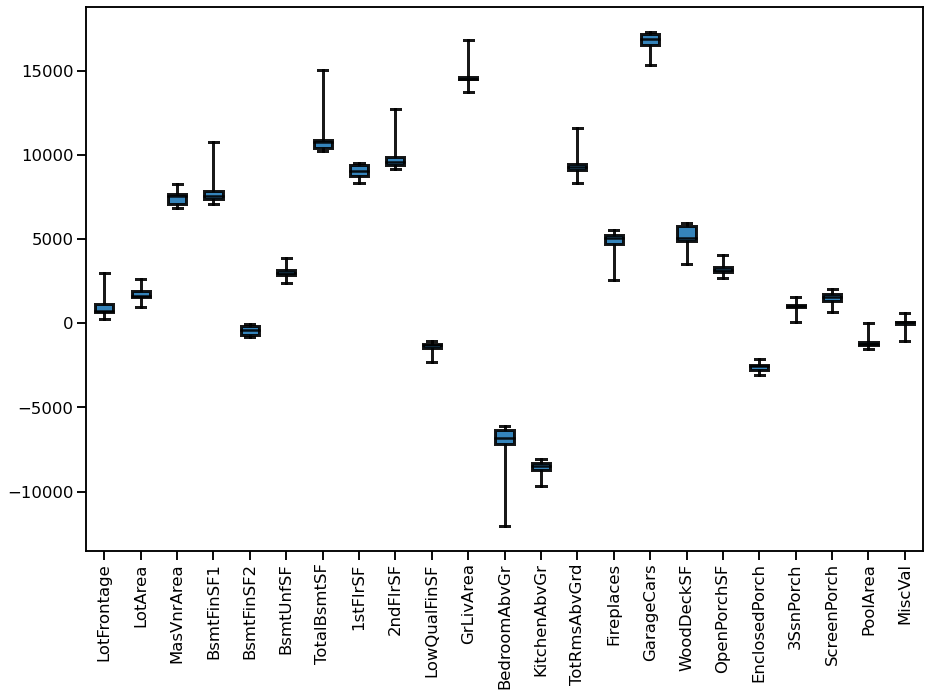

In [84]:
sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
coefs = pd.DataFrame([pipeline[-1].coef_ for pipeline in cv_results["estimator"]],
            columns=numerical_features_new)
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [103]:
# Q7
ridge_alphas = [est[-1].alpha_
              for est in cv_results["estimator"]]

print(ridge_alphas)

[331.13112148259074, 331.13112148259074, 288.40315031266056, 331.13112148259074, 331.13112148259074, 331.13112148259074, 288.40315031266056, 331.13112148259074, 63.0957344480193, 331.13112148259074]


In [106]:
# Q8
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

print(data.shape)

(48842, 4)


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [111]:
linear_classifier = make_pipeline(StandardScaler(), LogisticRegression())

cv_results_linear = cross_validate(linear_classifier, data, target,
    cv=10, return_train_score=True, return_estimator=True)

cv_results_dummy = cross_validate(DummyClassifier(), data, target,
    cv=10, return_train_score=True, return_estimator=True)


In [120]:
est_linear = [score for score in cv_results_linear["test_score"]]
est_dummy = [score for score in cv_results_dummy["test_score"]]

for(i, j) in zip(est_linear, est_dummy):
    print(i > j)

True
True
True
True
True
True
True
True
True
True


In [123]:
print(data.columns)

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')


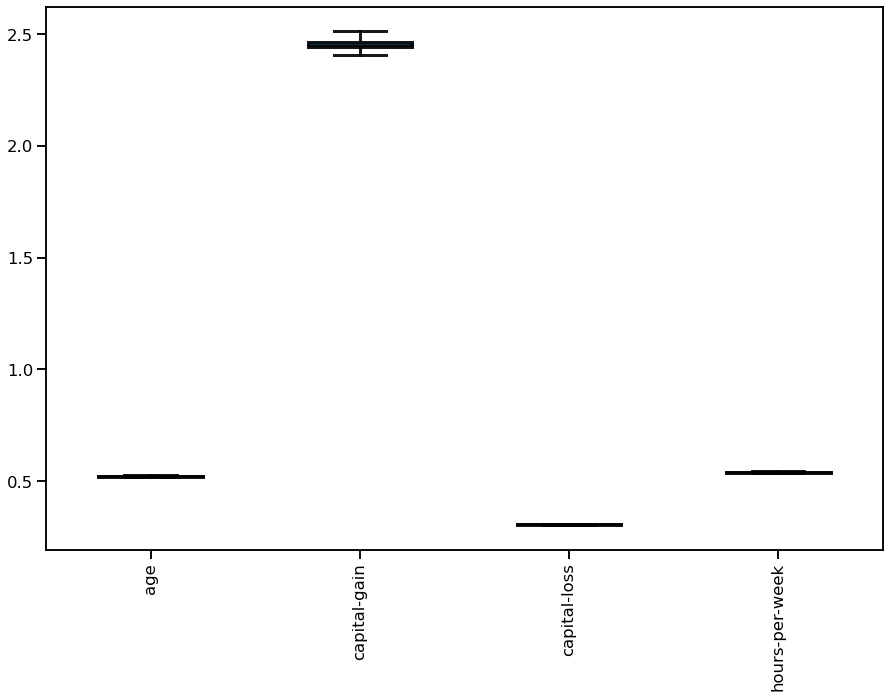

In [128]:
# Q10
sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
coefs = pd.DataFrame([pipeline[-1].coef_[0] for pipeline in cv_results_linear["estimator"]],
            columns=data.columns)
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [168]:
# Q11
data_numerical = adult_census.select_dtypes(["integer", "floating"])
data_numerical = data_numerical.drop(columns=["education-num"])

data_category = adult_census.select_dtypes(exclude=["integer", "floating"])
data_category = data_category.drop(columns="class")

print(data_numerical.shape, data_category.shape)
print(data_category.columns)
print(data_numerical.columns)

data = adult_census.drop(columns="class")

(48842, 4) (48842, 8)
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')
Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')


In [169]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
        ("one-hot-encoder", OneHotEncoder(handle_unknown="ignore"), data_category.columns),
        ("standard_scaler", StandardScaler(), data_numerical.columns)
    ])


In [170]:
linear_classifier_with_category = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))

cv_results_linear_with_category = cross_validate(linear_classifier_with_category, data, target,
    cv=10, return_train_score=True, return_estimator=True)

In [171]:
est_linear_with_category = [score for score in cv_results_linear_with_category["test_score"]]

for(i, j) in zip(est_linear_with_category, est_linear):
    print(i > j)

True
True
True
True
True
True
True
True
True
True


In [172]:
# Q12
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["one-hot-encoder"]
                             .get_feature_names_out(data_category.columns)).tolist()

feature_names += data_numerical.columns.tolist()
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

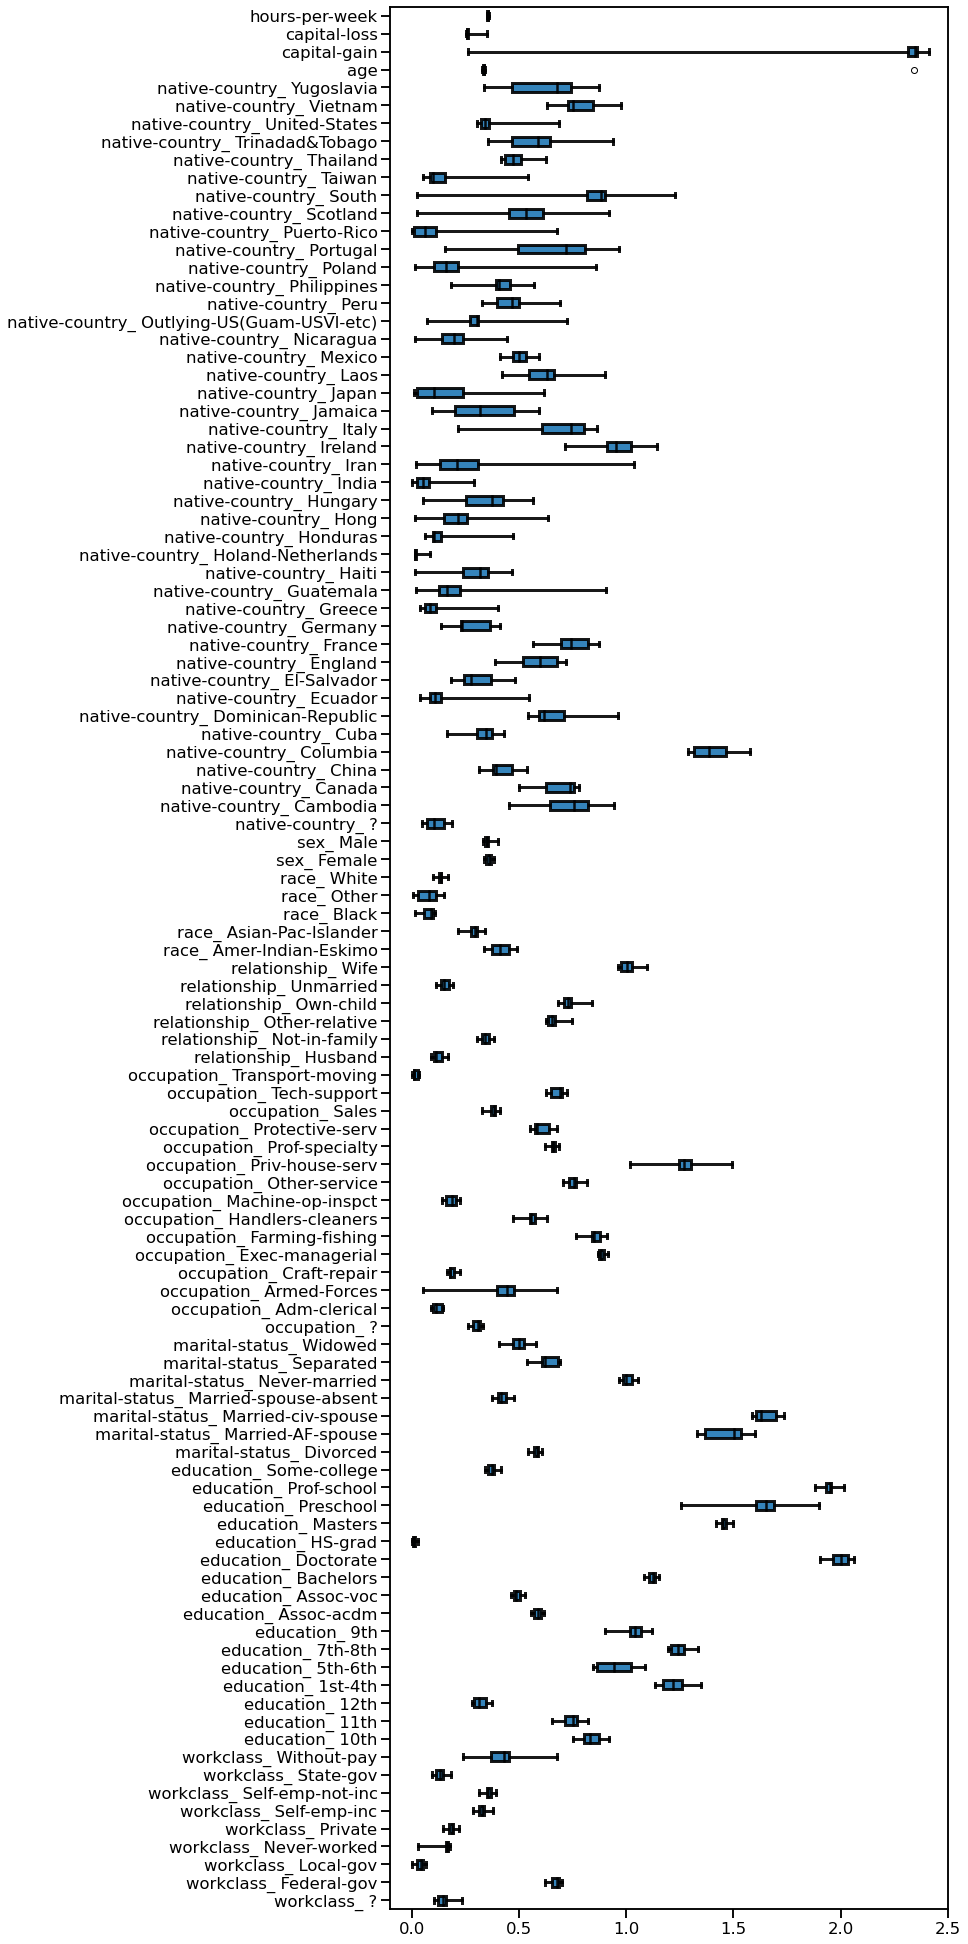

In [173]:
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results_linear_with_category["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
ax.set(xlim=(-0.1, 2.5))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)